In [67]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('./dataset/Maharastra Crop Production final.csv')
df.sample(10)

,District,Crop,Crop_Year,Season,Area,Production
4178,YAVATMAL,Groundnut,2000,Summer,5200.0,4000.0
641,SOLAPUR,Tur,2017,Kharif,29800.0,18700.0
6685,NANDURBAR,Maize,2005,Rabi,300.0,700.0
16527,AKOLA,Urad,2001,Kharif,14500.0,10800.0
8330,PUNE,Niger seed,2002,Kharif,2100.0,500.0
12282,SOLAPUR,Safflower,2009,Rabi,8600.0,5500.0
4993,NASHIK,Jowar,2017,Rabi,5800.0,3900.0
4114,WARDHA,Groundnut,2004,Kharif,1500.0,900.0
2070,NASHIK,Cotton,2017,Kharif,65400.0,144100.0
5116,PUNE,Jowar,2010,Kharif,8700.0,8300.0


In [69]:
df["Crop"].unique()

array(['Tur', 'Bajra', 'Banana', 'Castor seed', 'Cotton', 'Gram',
       'Groundnut', 'Jowar', 'Linseed', 'Maize', 'Moong', 'Niger seed',
       'Onion', 'Other  Rabi pulses', 'Other Cereals',
       'Other Kharif pulses', 'other oilseeds', 'Other Summer Pulses',
       'Ragi', 'Rapeseed &Mustard', 'Rice', 'Safflower', 'Sesamum',
       'Small millets', 'Soyabean', 'Sugarcane', 'Sunflower', 'Tobacco',
       'Urad', 'Wheat'], dtype=object)

In [70]:
len(df)

17922

In [71]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17922 entries, 0 to 17921
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   District    17922 non-null  object 
 1   Crop        17922 non-null  object 
 2   Crop_Year   17922 non-null  int64  
 3   Season      17922 non-null  object 
 4   Area        17922 non-null  float64
 5   Production  17615 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 840.2+ KB


In [73]:
df.isnull().sum()

District        0
Crop            0
Crop_Year       0
Season          0
Area            0
Production    307
dtype: int64

## Plot graph to see null values heatmap and data distribution plot

<Axes: >

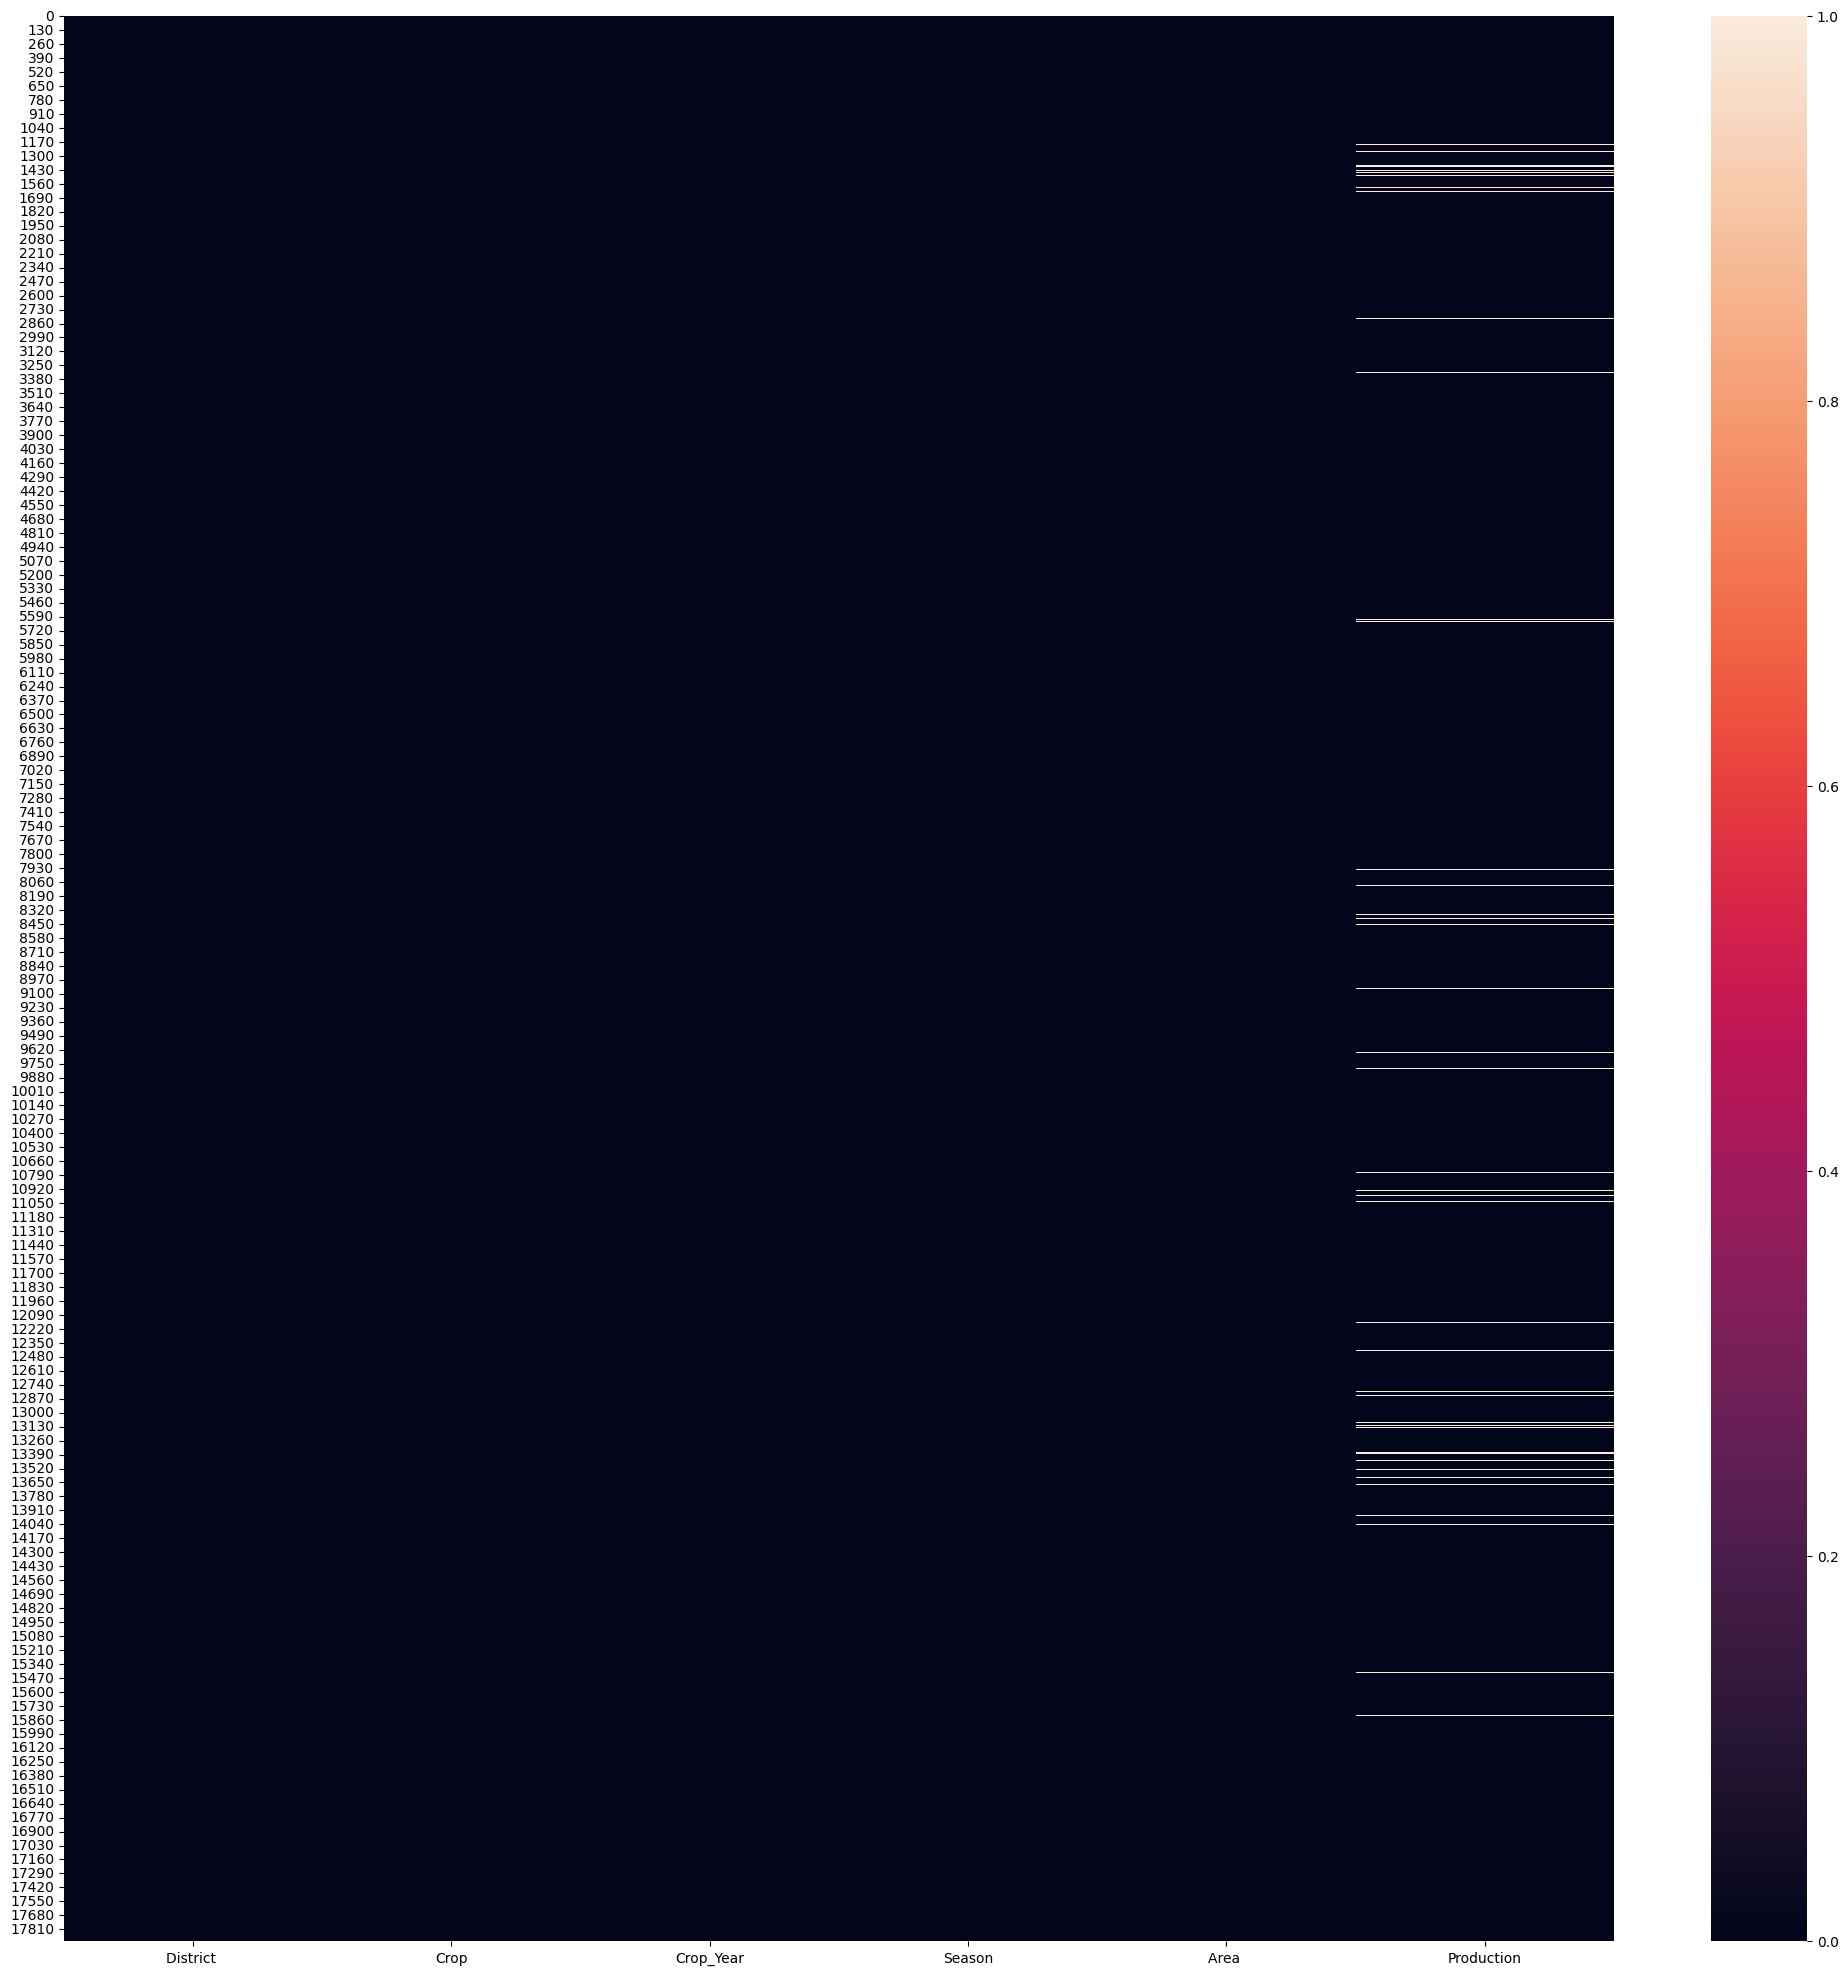

In [74]:
#vizualise null values
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

### data distribution plot befor data cleaning

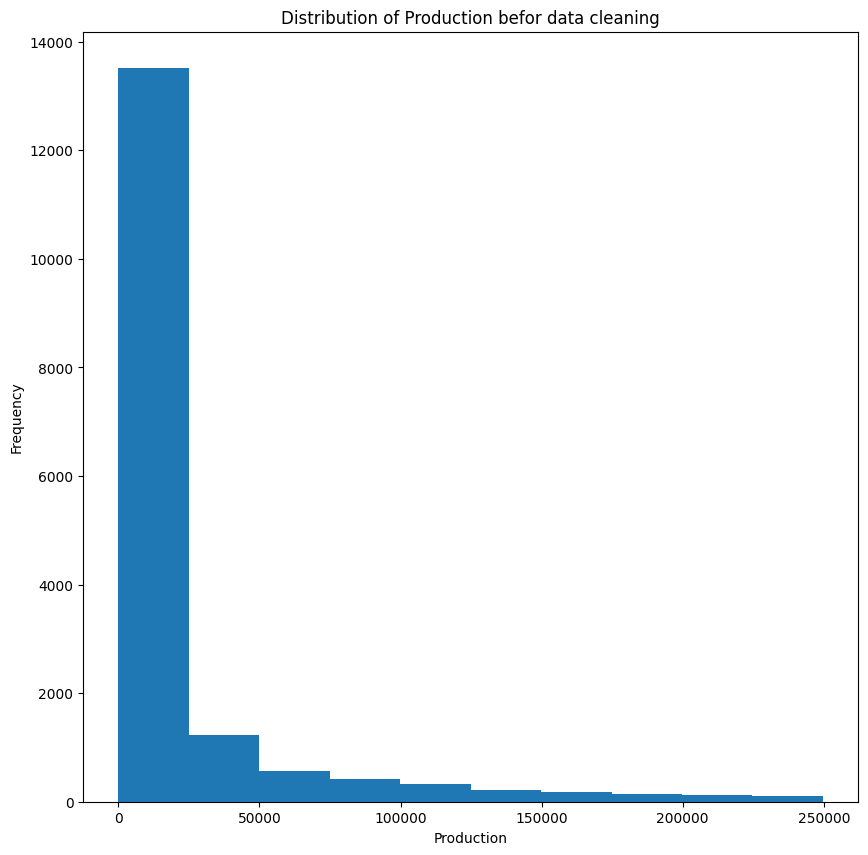

In [75]:
# data distribution plot befor data cleaning
plt.figure(figsize=(10,10))
# Create a histogram of the Production column
plt.hist(df['Production'], bins=10,range=(0, 249700))

# Set the title and labels
plt.title('Distribution of Production befor data cleaning')
plt.xlabel('Production')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [76]:
#Fill NaN values by Median
# df['Production']=df['Production'].fillna(df['Production'].mean())
# df['Production'].isnull().sum()
df=df.dropna()
df.isnull().sum()

District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
dtype: int64

In [77]:
len(df)

17615

### data distribution plot after data cleaning

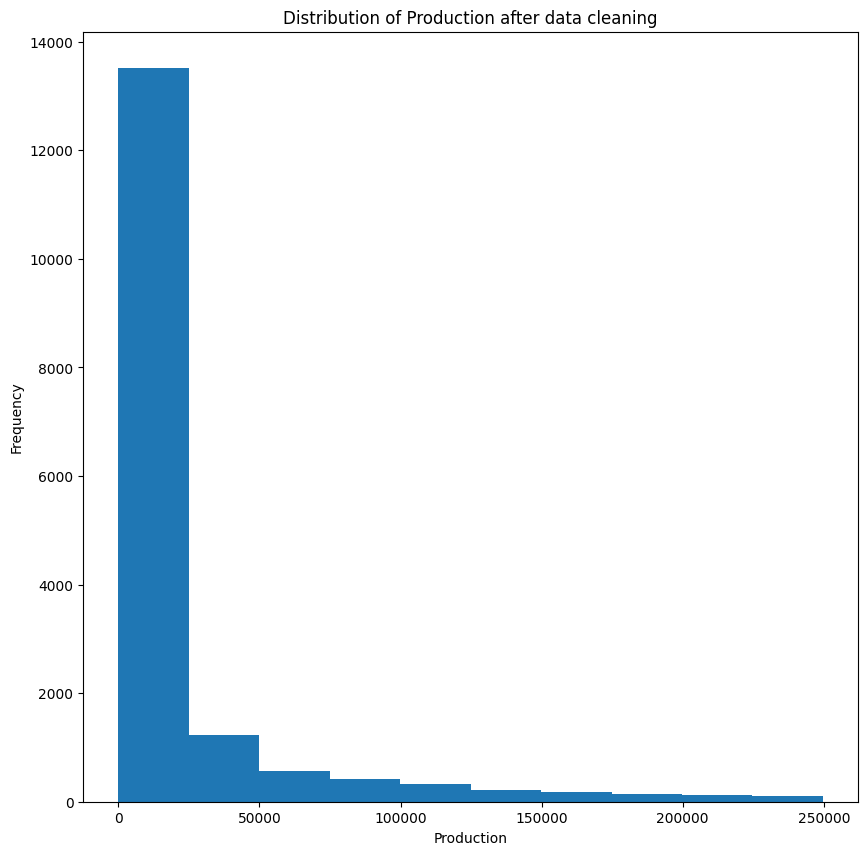

In [78]:
# data distribution plot befor data cleaning
plt.figure(figsize=(10,10))
# Create a histogram of the Production column
plt.hist(df['Production'], bins=10,range=(0, 249700))

# Set the title and labels
plt.title('Distribution of Production after data cleaning')
plt.xlabel('Production')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [79]:
df.isnull().sum()

District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
dtype: int64

In [80]:
df

,District,Crop,Crop_Year,Season,Area,Production
0,AHMEDNAGAR,Tur,1997,Kharif,17600.00,6300.0
1,AHMEDNAGAR,Tur,1998,Kharif,18800.00,9700.0
2,AHMEDNAGAR,Tur,1999,Kharif,19000.00,9900.0
3,AHMEDNAGAR,Tur,2000,Kharif,19100.00,9400.0
4,AHMEDNAGAR,Tur,2001,Kharif,16700.00,5400.0
...,...,...,...,...,...,...
17917,YAVATMAL,Wheat,2015,Rabi,35600.00,37600.0
17918,YAVATMAL,Wheat,2016,Rabi,60200.00,77900.0
17919,YAVATMAL,Wheat,2017,Rabi,12800.00,13000.0
17920,YAVATMAL,Wheat,2018,Rabi,34613.25,32500.0


In [81]:
# Group the data by Centername and months and take the mean of the fruit prices for each group
df_grouped = df.groupby(['District ', 'Crop','Crop_Year','Season']).mean().reset_index()
df_grouped.sample(10)

,District,Crop,Crop_Year,Season,Area,Production
98,AHMEDNAGAR,Groundnut,2005,Kharif,4900.0,2400.0
15032,SINDHUDURG,Groundnut,2011,Kharif,2000.0,1900.0
2464,BEED,Linseed,2004,Rabi,4500.0,700.0
2109,AURANGABAD,Small millets,2014,Rabi,2900.0,600.0
8466,LATUR,Soyabean,2006,Kharif,155400.0,43300.0
2608,BEED,Other Rabi pulses,2016,Rabi,40.0,20.0
11110,OSMANABAD,Gram,2017,Rabi,153482.0,117900.0
4701,DHULE,Other Kharif pulses,2018,Kharif,160.0,56.0
2575,BEED,Niger seed,2005,Kharif,2000.0,400.0
11045,OSMANABAD,Bajra,2015,Kharif,10200.0,1700.0


In [82]:
# Split X and y variables
X = df_grouped.iloc[:, [0, 1, 2, 3, 4]]
y = df_grouped.iloc[:, [5]]

In [83]:
X

,District,Crop,Crop_Year,Season,Area
0,AHMEDNAGAR,Bajra,1997,Kharif,274100.00
1,AHMEDNAGAR,Bajra,1998,Kharif,302400.00
2,AHMEDNAGAR,Bajra,1999,Kharif,310600.00
3,AHMEDNAGAR,Bajra,2000,Kharif,326100.00
4,AHMEDNAGAR,Bajra,2001,Kharif,194400.00
...,...,...,...,...,...
17610,YAVATMAL,Wheat,2017,Rabi,12800.00
17611,YAVATMAL,Wheat,2018,Rabi,34613.25
17612,YAVATMAL,Wheat,2019,Rabi,45633.00
17613,YAVATMAL,other oilseeds,2003,Kharif,100.00


In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
trf1=ColumnTransformer([ 
    ('ohe_data', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0,1,3]),
    ('scale_data', StandardScaler(), [4]),
    ],remainder='passthrough')

In [86]:
from sklearn.ensemble import BaggingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
trf2_BR = BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
from sklearn.linear_model import HuberRegressor
# trf2_RR=huber_reg = HuberRegressor(epsilon=20.35)
trf2_RR = LinearDiscriminantAnalysis()

In [87]:
# Create the pipeline for one-hot encoding and linear regression
pipeline = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2_BR),])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_data',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3]),
                                                 ('scale_data',
                                                  StandardScaler(), [4])])),
                ('trf2', BaggingRegressor(base_estimator=None))])

In [88]:
# Create the pipeline for one-hot encoding and linear regression
pipeline2 = Pipeline([
    ('trf1',trf1),
    ('trfRR',trf2_RR),])
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_data',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3]),
                                                 ('scale_data',
                                                  StandardScaler(), [4])])),
                ('trfRR', LinearDiscriminantAnalysis())])

In [89]:
# Evaluate the pipeline on the testing data
score = pipeline.score(X_test, y_test)
score2 = pipeline2.score(X_test, y_test)
print("R-squared score for BR:", score)
print("R-squared score for RR:", score2)

R-squared score for BR: 0.9477207665385065
R-squared score for RR: 0.018734033494181096


In [90]:
# Predict
y_pred_BR = pipeline.predict(X_test)
y_pred_RR = pipeline2.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error
# Make predictions on the testing data

# Evaluate the model performance using Root Mean Squared Error (RMSE)
rmse_BR = mean_squared_error(y_test, y_pred_BR, squared=False)
rmse_RR = mean_squared_error(y_test, y_pred_RR, squared=False)
print("RMSE for BR:", rmse_BR)
print("RMSE for RR:", rmse_RR)

RMSE for BR: 157475.76782668097
RMSE for RR: 186991.87493633534


In [92]:
# # cross validation using cross_val_score
# from sklearn.model_selection import cross_val_score
# cv_scores_RFR = cross_val_score(pipeline, X_train, y_train, cv=15)
# print("Mean of Cross-validation R-squared scores:", cv_scores_RFR.mean())

In [93]:
# # export 
import pickle
pickle.dump(pipeline,open('model.pkl','wb'))

In [94]:
model_save = pickle.load(open('model.pkl','rb'))

In [95]:
df.iloc[14986]

District         YAVATMAL
Crop            Sugarcane
Crop_Year            2019
Season        Whole Year 
Area               8846.0
Production       614827.0
Name: 15269, dtype: object

In [96]:
import pandas as pd

# Create a sample input
sample_input = pd.DataFrame({
    'District ': ['YAVATMAL'],
    'Crop': ['Sugarcane'],
    'Crop_Year': [2019],
    'Season': ['Whole Year'],
    'Area ': [8846.0]
})

# Use the trained pipeline to predict the production for the sample input
predicted_production =pipeline.predict(sample_input)

# Print the predicted production
print(predicted_production)


[601471.7]


In [97]:
y_test.iloc[1]

Production    2200.0
Name: 2177, dtype: float64

In [98]:
# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import cross_val_score
# import numpy as np
# # Create a list of regression models
# models = [LinearRegression(), KNeighborsRegressor(n_neighbors=5), DecisionTreeRegressor()]

# # Train and evaluate each model using 5-fold cross-validation
# for model in models:
#     pipeline = Pipeline([
#         ('trf1', trf1),
#         ('trf2', model),
#     ])
#     scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#     rmse_scores = np.sqrt(-scores)
#     print('Model:', model.__class__.__name__)
#     print('Mean RMSE:', rmse_scores.mean())
#     print('Standard deviation of RMSE:', rmse_scores.std())
#     print('\n')
